### IPL 2022 Capstone Project

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**
* date : string  
* venue : string  
* stage : string  
* team1 : string  
* team2 : string  
* toss_winner : string  
* toss_decision : string  
* first_ings_score : integer  
* second_ings_score : integer  
* match_winner : string  
* won_by : string  
* margin : integer  
* player_of_the_match : string  
* top_scorer : string  
* highscore : integer  
* best_bowling : string  
* best_bowling_fgure : string  
gure : string  


### Loading the Libraries and Dataset

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [206]:
print(f"Your rows are {df.shape[0]} and your columns are {df.shape[1]}")

Your rows are 74 and your columns are 20


Now let's see how many columns have null values in total.

In [207]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, Here comes some Basic Questions**

1. Which team won the most matches?

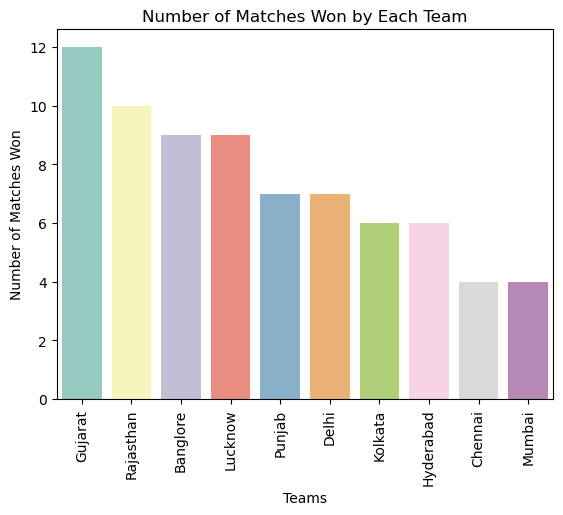

In [208]:
match_wins=df["match_winner"].value_counts()
sns.countplot(data=df,x="match_winner",order=match_wins.index,palette="Set3")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Number of Matches Won")
plt.title("Number of Matches Won by Each Team")
plt.show()

2. Toss Decision Trends

In [209]:
toss_trend=df["toss_decision"].value_counts()
toss_trend

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

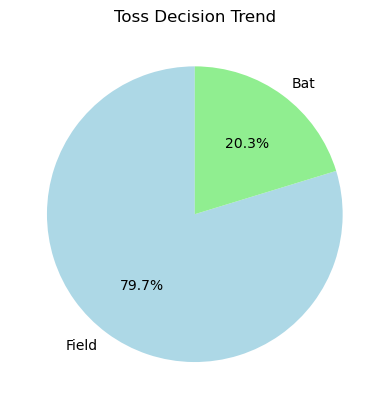

In [210]:
plt.pie(toss_trend,labels=toss_trend.index,autopct="%1.1f%%",colors=["lightblue","lightgreen"],startangle=90)
plt.title("Toss Decision Trend")
plt.show()

3. Toss Winner vs Match Winner

In [211]:
tm_count=df[df["toss_winner"]==df["match_winner"]]["match_id"].count()
percentage=(tm_count*100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

In [212]:
team_won_by=df["won_by"].value_counts()
team_won_by

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

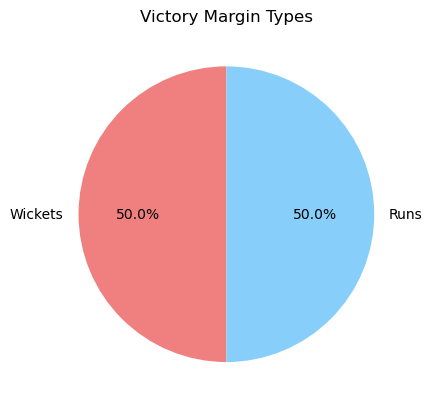

In [213]:
plt.pie(team_won_by,labels=team_won_by.index,autopct="%1.1f%%",colors=["lightcoral","lightskyblue"],startangle=90)
plt.title("Victory Margin Types")
plt.show()

###  Key Player Performances

1. Top 5 Most "Player of the Match" Awards

In [214]:
players=df["player_of_the_match"].value_counts().head()
players

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Name: count, dtype: int64

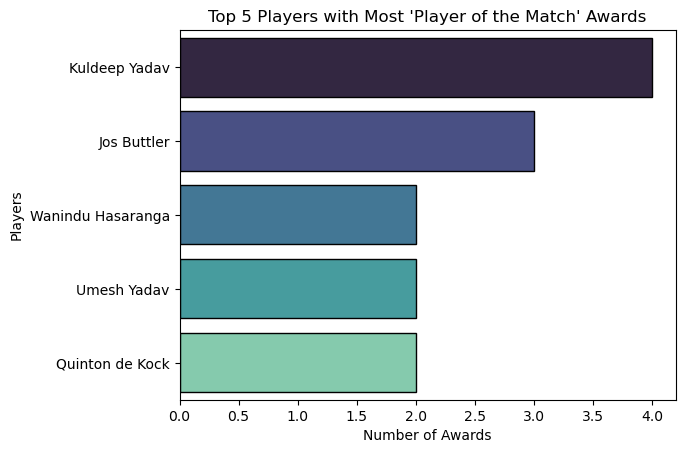

In [215]:
sns.barplot(y=players.index,x=players.values,palette="mako",edgecolor="black")
plt.xlabel("Number of Awards")
plt.ylabel("Players")
plt.title("Top 5 Players with Most 'Player of the Match' Awards")
plt.show()

2. Top 5 Scorers

In [216]:
top_players=df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head()
top_players

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

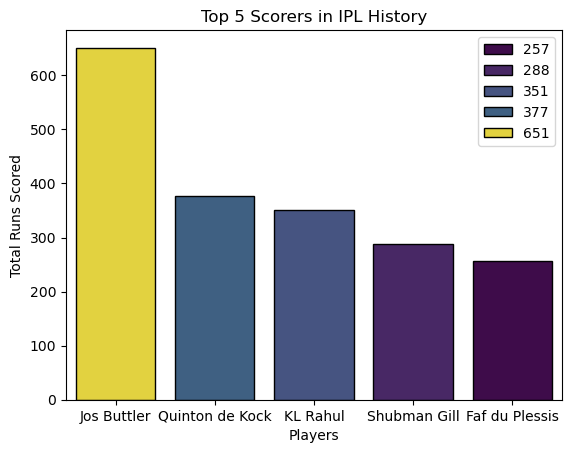

In [217]:
sns.barplot(x=top_players.index,y=top_players.values,palette="viridis",edgecolor="black",hue=top_players.values)
plt.xlabel("Players")
plt.ylabel("Total Runs Scored")
plt.title("Top 5 Scorers in IPL History")
plt.show()

3. 10 Best Bowling Figures

In [218]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [219]:
df["wickets"]=df["best_bowling_figure"].str.extract(r"(\d{1})")
df["wickets"]=df["wickets"].astype(int)
best_bowler=df.groupby("best_bowling")["wickets"].sum().sort_values(ascending=False).head(10)
best_bowler

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: wickets, dtype: int64

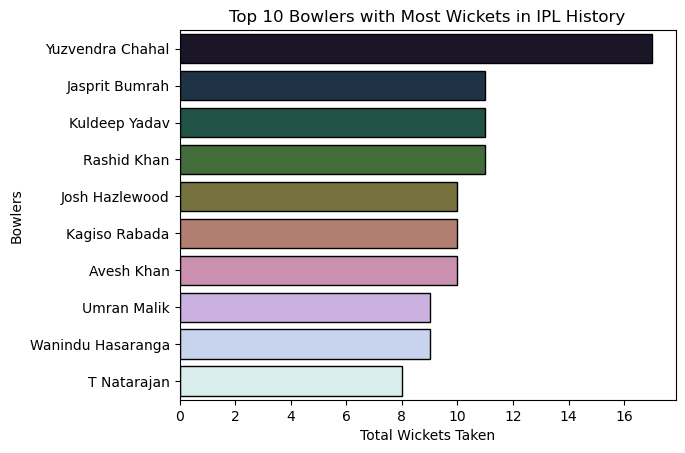

In [220]:
sns.barplot(y=best_bowler.index,x=best_bowler.values,palette="cubehelix",edgecolor="black")
plt.xlabel("Total Wickets Taken")
plt.ylabel("Bowlers")
plt.title("Top 10 Bowlers with Most Wickets in IPL History")
plt.show()

###  Venue Analysis

1. Most Matches Played by Venue

In [221]:
most_match_venue=df["venue"].value_counts()
most_match_venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

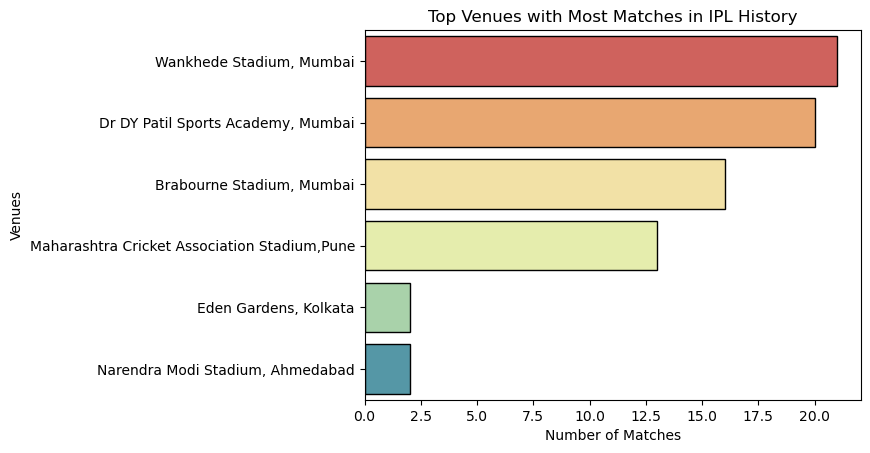

In [222]:
sns.barplot(x=most_match_venue.values,y=most_match_venue.index,palette="Spectral",edgecolor="black")
plt.xlabel("Number of Matches")
plt.ylabel("Venues")
plt.title("Top Venues with Most Matches in IPL History")
plt.show()

### Custom Questions & Insights
Q1: Who won the highest margin by runs?

In [223]:
df[df["won_by"]=="Runs"].sort_values(by="margin",ascending=False).head(1)[["match_winner","won_by"]]

,match_winner,won_by
54,Chennai,Runs


Q2: Which player had the highest individual score?

In [224]:
df[df["highscore"]==df["highscore"].max()][["top_scorer","highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [234]:
df[df["wickets"]==df["wickets"].max()][["best_bowling","best_bowling_figure"]]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
